# # Brazil Hospital Appointment Data Analysis Report

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 In this Brazil Hospital Appointment dataset, we are going to play with around 100k data collected from the Brazil hospital on the patient appointment details and wheather they had shown up to the hospital once after booking his or her appointments.The goal is to investigate the scenario in which they shown their apperance to the appointment booked.
 
 

The Dataset has some attributes with detailed information such as: 
<ul> 
  <li>Patient Id    : Unique Id assigned against each patient who is booking the appointments.</li>
  <li>Appointment Id: Unique Id assigned against each appointments which is booked by the patients.</li>
  <li>Gender        : Patient's gender.</li>
  <li>ScheduledDay  : Date and time the appointments was booked.</li>
  <li>AppointmentDay: Date and time booked to shown up to the hospital.</li>
  <li>Age           : Patients age.</li>
  <li>Neighbourhood : Location of the appoinments booked.</li>
  <li>Scholarship   : Wheather the patient enrolled for Brazil Welfare Program.</li>
  <li>Hipertension  : Indicating wheather he or she has hipertension.</li>
  <li>Diabetes      : Indicating wheather he or she has diabetes.</li>
  <li>Alcoholism    : Indicating wheather he or she has addicted to alcohol.</li>
  <li>Handcap       : Indicating wheather he or she has any disabilities.</li>
  <li>SMS Received  : Indicating wheather he or she got some notofications after booking appointments.</li>
  <li>No_show       : Patient turned up for their appoinment or not?</li>
</ul>

This report focuses on columns such as age,gender,Dayofweek,Scholarship,SMS_received and diseases like (hipertension,diabetes,
alcoholism) based analysis.

## Package Importing 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data Wrangling and General Properties

In [36]:
# Load No Show Appointments csv file and preview the first 5 rows
data = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv")
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [37]:
# Dimensions of the dataset
data.shape

(110527, 14)

 The given dataset has 110527 rows with 14 columns.

In [38]:
# Previous data types and missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [39]:
# Preview statistics for each columns
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


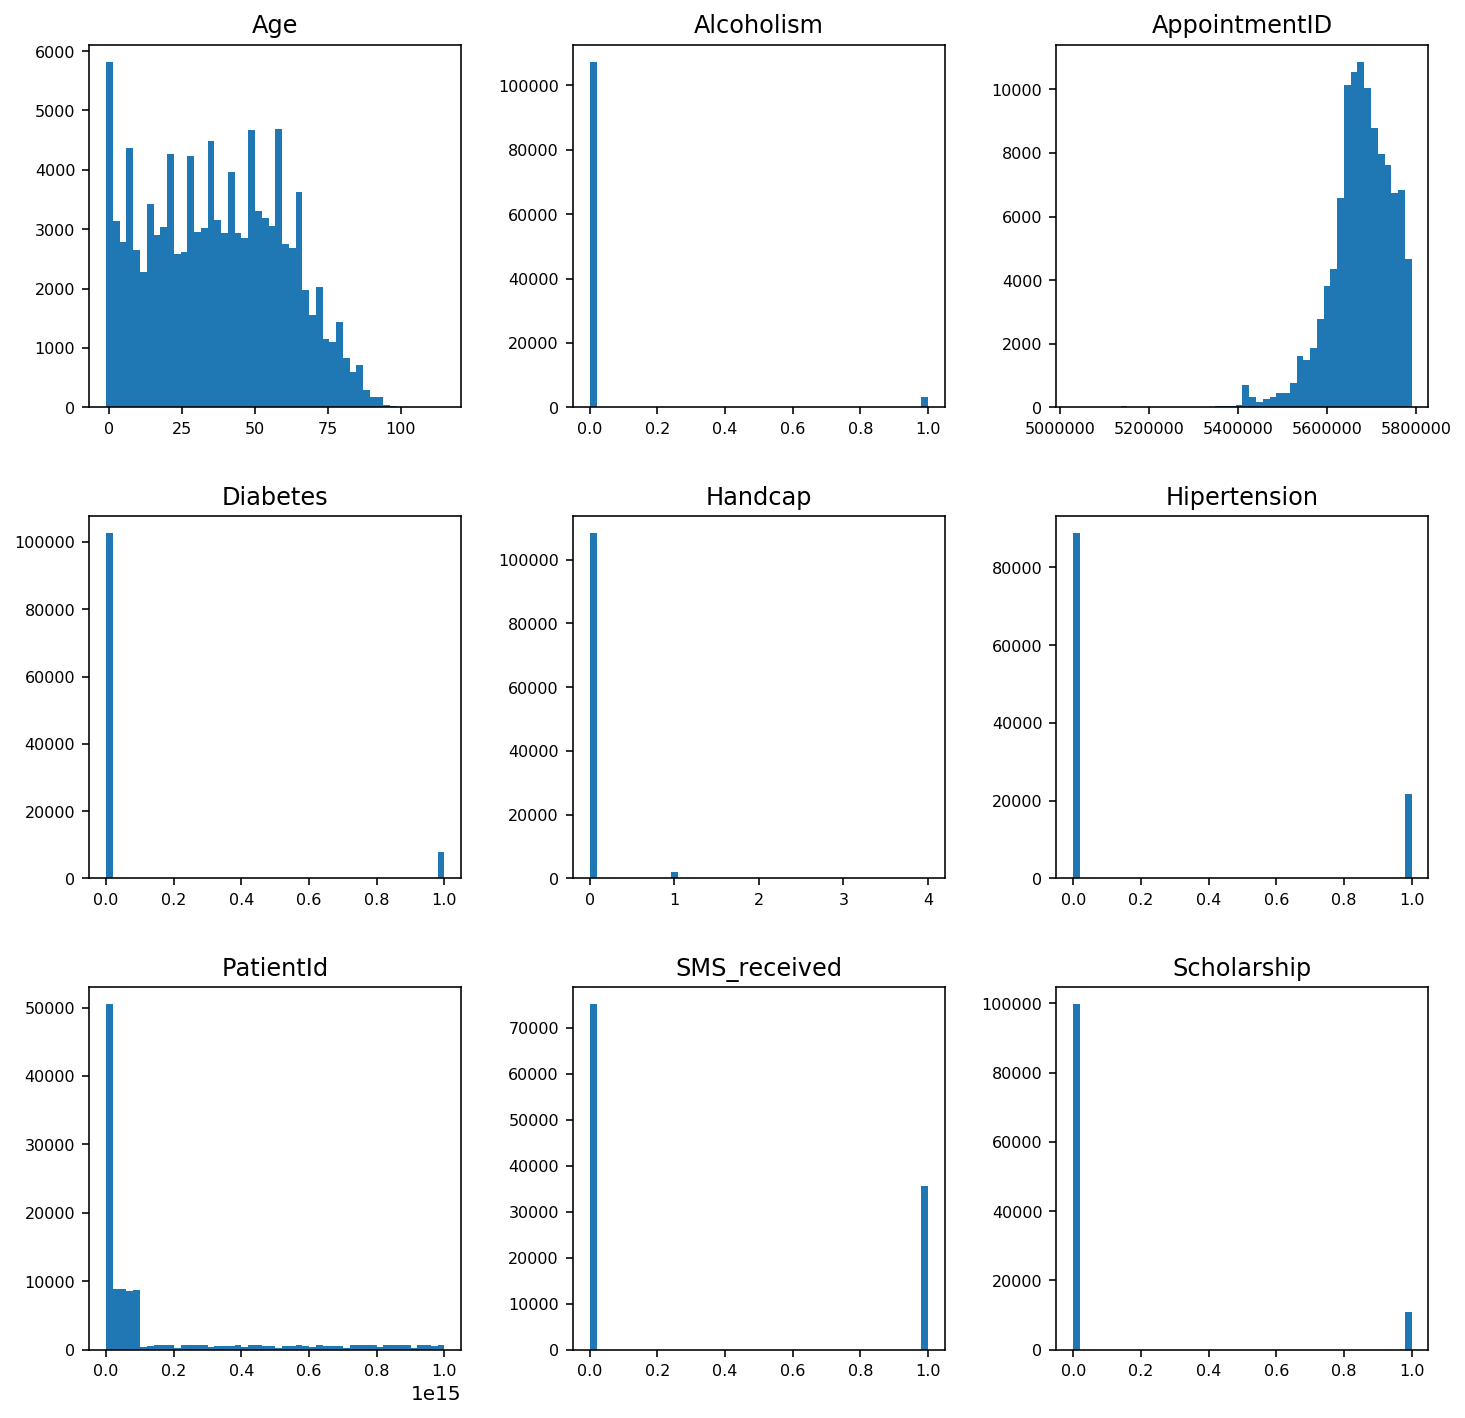

In [40]:
# Preview overall distribution of data from each properties
data.hist(figsize=(12,12),bins=50,xlabelsize=8,ylabelsize=8,grid=False);

From the above histogram it is conclusive that Age data is skewed towards right and other columns like Alchocalism, Diabetes, Hipertension,SMS Received and Scholarship has the values 0 and 1 which is indicating yes or no.

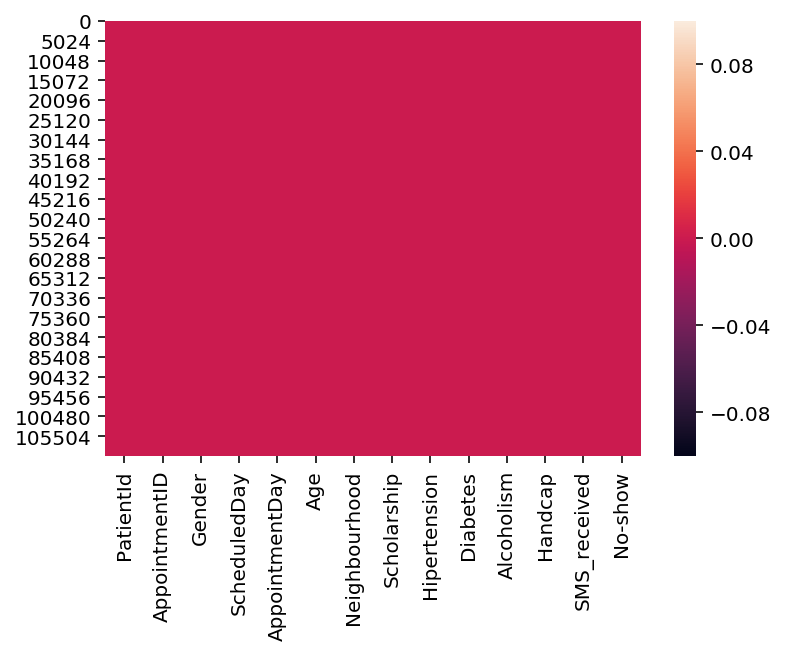

In [42]:
# Checking the columns has any missing values using heat map

sns.heatmap(data.isnull());

It is conclusive that **No columns has missing values** in the dataset.

In [43]:
# checking for duplicates

sum(data.duplicated())

0

There is **no duplicates** in the data

## Data Cleaning

In [44]:
# removing the unwanted columns in the dataset
data.columns
data.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

Columns which is not been used further in this data analysis process has been removed.
    
   **PatientId** : Its an unique number so it doesnt has any useful purpose in our analysis
     
   **AppointmentID** : Similar to Patient Id so we are removing this from our dataset

In [45]:
#Chhecking wheather the columns gets deleted or not?
data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [46]:
# Renaming the available columns 

data.rename(columns={'Gender':'gender','AppointmentDay':'app_day'},inplace=True)
data.rename(columns={'Age':'age','ScheduledDay':'sch_day','Neighbourhood':'location','Scholarship':'scholarship','Hipertension':'hipertension','Diabetes':'diabetes','Alcoholism':'alcoholism','Handcap':'handcap','SMS_received':'sms_received','No-show':'turned_up'},inplace=True)

In [47]:
#Replacing the no and yes in apperaed columns to 0 and 1

data['turned_up'].replace('No',1,inplace=True)
data['turned_up'].replace('Yes',0,inplace=True)


Previously No-Shown column indicated whether he or she turned up for the appointments:
**No - Turned Up for the appointments**
**Yes - Missing the scheduled appointments**

Now in turned up column the:
**1 - indicates that the person appered for the appointment 
  0 -  indicates that the person not appered for the appointment **

In [48]:
data.head()

,gender,sch_day,app_day,age,location,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,turned_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [49]:
#Age column has some negative value so it has to be removed
data=data.drop(data[data.age < 0].index)

In [50]:
#Checking wheather those negative columns has been removed or not?

data.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,turned_up
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [17]:
# The handcap column should contain the values  0 and 1 but it has few more values other than this
# so I am trying to remove all those records.

In [51]:
data=data.drop(data[(data.handcap>1) | (data.handcap<0)].index)

In [52]:
#Checking wheather those records has been removed or not?

data.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,turned_up
count,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182,0.798073
std,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932,0.401440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# Changing the Datatype to datetime
data['sch_day'] = pd.to_datetime(data['sch_day'])
data['app_day']=pd.to_datetime(data['app_day'])

In [54]:
#Extracting the Year and Month from the data and store it in seperate column
data['sch_year'] = data['sch_day'].apply(lambda x:x.year)
data['app_year'] = data['app_day'].apply(lambda x:x.year)
data['sch_month'] = data['sch_day'].apply(lambda x:x.month)
data['app_month'] = data['app_day'].apply(lambda x:x.month)
data['sch_hour'] = data['sch_day'].apply(lambda x:x.hour)
data['day']= data['app_day'].apply(lambda x:x.dayofweek)

In [58]:
# Converting WeekDay to the Name of the Day
dayofweek = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thrusday',4:'Friday',5:'Saturday',6:'Sunday'}
data['weekday'] = data['app_day'].dt.dayofweek.map(dayofweek)

In [59]:
# Reordering the columns 
data1 = ['gender', 'sch_day','app_day','sch_year', 'app_year', 'sch_month', 'app_month',
       'sch_hour','day','weekday','age', 'location', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'turned_up']
data = data.reindex(columns=data1)

In [60]:
data.shape

(110327, 19)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 19 columns):
gender          110327 non-null object
sch_day         110327 non-null datetime64[ns]
app_day         110327 non-null datetime64[ns]
sch_year        110327 non-null int64
app_year        110327 non-null int64
sch_month       110327 non-null int64
app_month       110327 non-null int64
sch_hour        110327 non-null int64
day             110327 non-null int64
weekday         110327 non-null object
age             110327 non-null int64
location        110327 non-null object
scholarship     110327 non-null int64
hipertension    110327 non-null int64
diabetes        110327 non-null int64
alcoholism      110327 non-null int64
handcap         110327 non-null int64
sms_received    110327 non-null int64
turned_up       110327 non-null int64
dtypes: datetime64[ns](2), int64(14), object(3)
memory usage: 16.8+ MB


After Data cleaning we have  **110327 records with 17 columns** and the above list indicates the columns available in the dataset.

<a id='eda'></a>
## Exploratory Data Analysis (General Exploration)

### 1. Which gender in general books the appointment most?

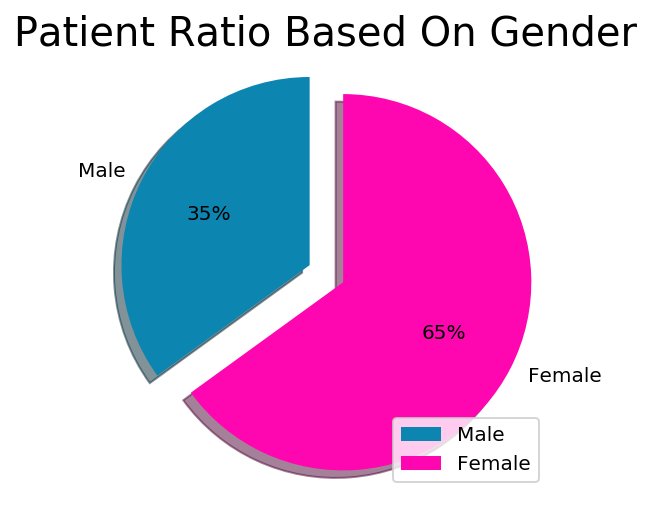

In [62]:
# Patient ratio based on gender
labels = 'Male', 'Female'
Totalcount = data['gender'].count()
Maleprop = ((data[data['gender']=='M'].count()['gender'])/Totalcount)*100
Femaleprop = ((data[data['gender']=='F'].count()['gender'])/Totalcount)*100
sizes = [Maleprop,Femaleprop]
explode = (0.2, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
col = ["#0C86B1","#ff07b0"]
fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90,colors=col)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
leg = ax1.legend(loc=4)
plt.title("Patient Ratio Based On Gender",fontsize=20)
plt.show()


It is evident from the above picture that **Female patient are more in number** when compared to **Male patient**.

### 2. What percentage of Male turned up for their appointments ?

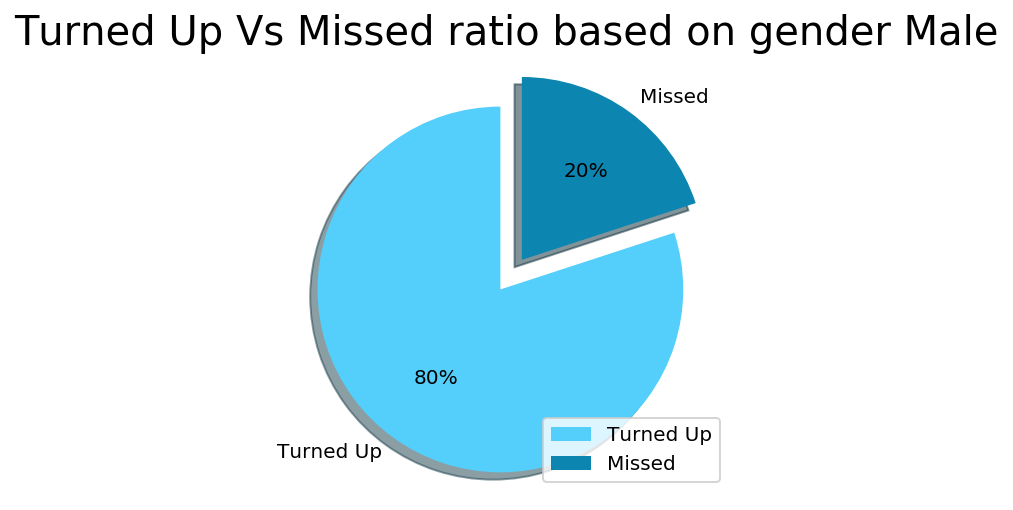

In [63]:
labels = 'Turned Up','Missed'
Male = data[ data['gender']=='M'] 
Mturned = Male[Male['turned_up']==1]['gender'].count()
MMissed =  Male[Male['turned_up']==0]['gender'].count()
Totalcount = Male['gender'].count()
Successprop = (Mturned/Totalcount)*100
Missedprop = (MMissed/Totalcount)*100
sizes = [Successprop,Missedprop]
explode = (0.2, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
col = ["#54CFFB", "#0C86B1"]
fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',shadow=True, startangle=90,colors=col)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
leg = ax1.legend(loc=4)
plt.title("Turned Up Vs Missed ratio based on gender Male",fontsize=20)
plt.show()

### 3. What percentage of Male turned up for their appointments ?


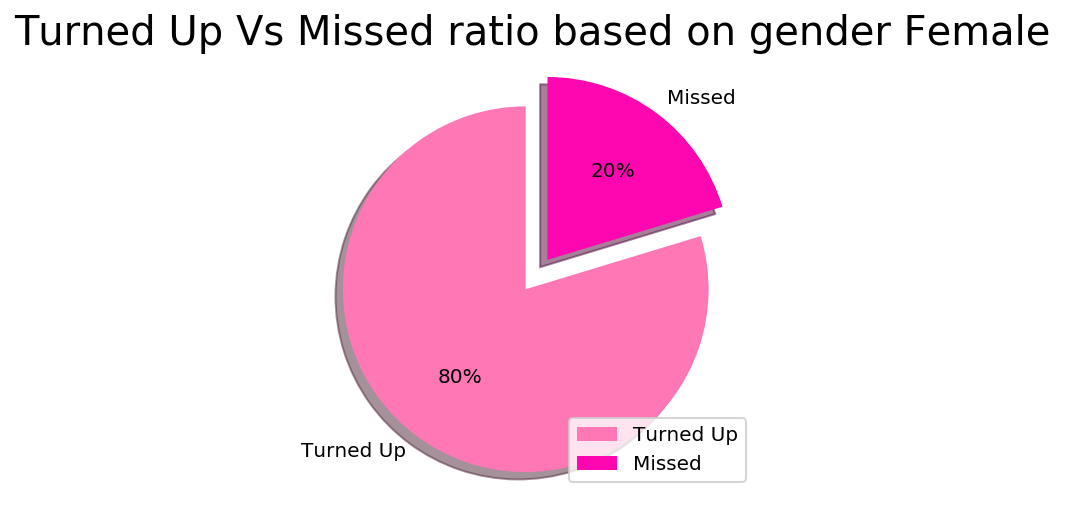

In [64]:
labels = 'Turned Up','Missed'
Female = data[ data['gender']=='F'] 
Fturned = Female[Female['turned_up']==1]['gender'].count()
FMissed =  Female[Female['turned_up']==0]['gender'].count()
Totalcount = Female['gender'].count()
Successprop1 = (Fturned/Totalcount)*100
Missedprop1 = (FMissed/Totalcount)*100
sizes = [Successprop1,Missedprop1]
explode = (0.2, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
col = ["#ff77b4", "#ff07b0"]
fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',shadow=True, startangle=90,colors=col)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
leg = ax1.legend(loc=4)
plt.title("Turned Up Vs Missed ratio based on gender Female",fontsize=20)
plt.show()

It is conclusive from the above two visuals that **around 80% of the patients turned up for their appointments in both the gender**.

### 4. Which gender has greatest life span?

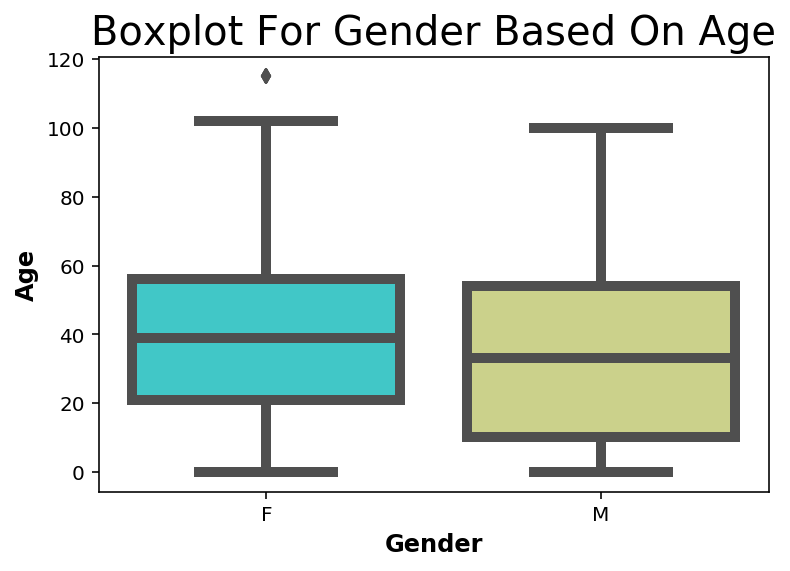

In [66]:
sns.boxplot(x='gender',y='age',data=data,palette='rainbow',linewidth=5.0);
plt.title("Boxplot For Gender Based On Age",fontsize=20);
plt.xlabel('Gender',fontsize=12,fontweight ='bold');
plt.ylabel('Age',fontsize=12,fontweight ='bold');

From the box plot it is conclusive that **Female has life span greater than the Male**.

### 5. Which age group has the most number of patients? 

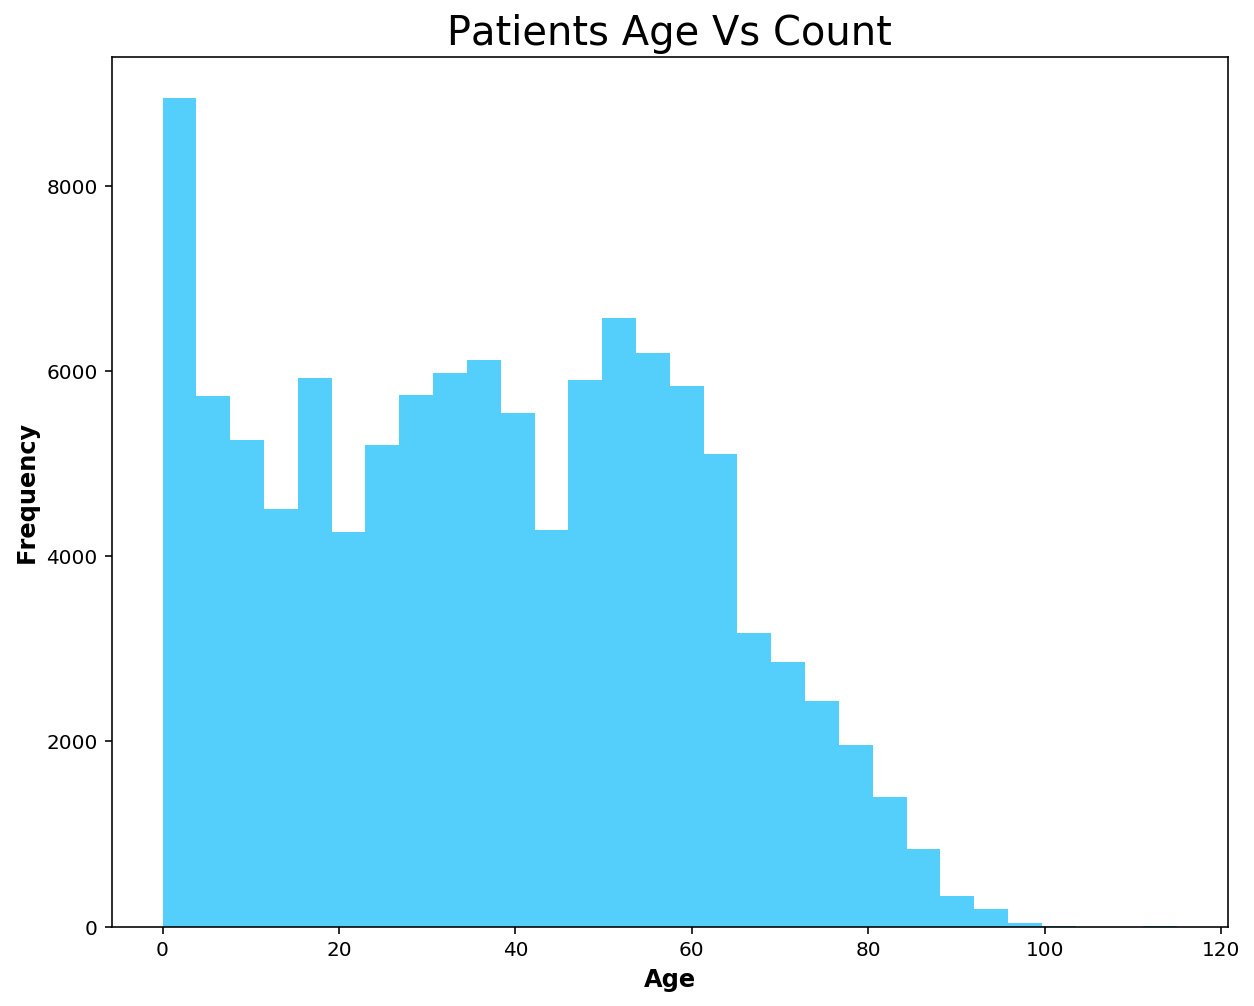

In [67]:
plt.figure(figsize=(10,8));
data['age'].hist(grid=False,bins=30,color='#54CFFB');
plt.title('Patients Age Vs Count',fontsize=20);
plt.xlabel('Age',fontsize=12,fontweight ='bold');
plt.ylabel('Frequency',fontsize=12,fontweight ='bold');

It is evident that most of the patients to whom the appointments booked are **below 55 of age**.Moreover manny of the appointments are booked for **small kids with age around 4**.

In [109]:
#Creating a dataframe with records grouped by gender and sms_received
data_gen_sms = data.groupby(['gender','sms_received'])['turned_up'].value_counts()
data_gen_sms_df = data_gen_sms.to_frame()



In [72]:
# renaming the column as count

data_gen_sms_df.rename(columns={'turned_up':'count'},inplace=True)
data_gen_sms_df

count
gender sms_received turned_up       
F      0            1          39698
                    0           7855
       1            1          17464
                    0           6713
M      0            1          22691
                    0           4648
       1            1           8196
                    0           3062

### 6. Wheather SMS_receiving is highly associated with patients turned up for the appointments?

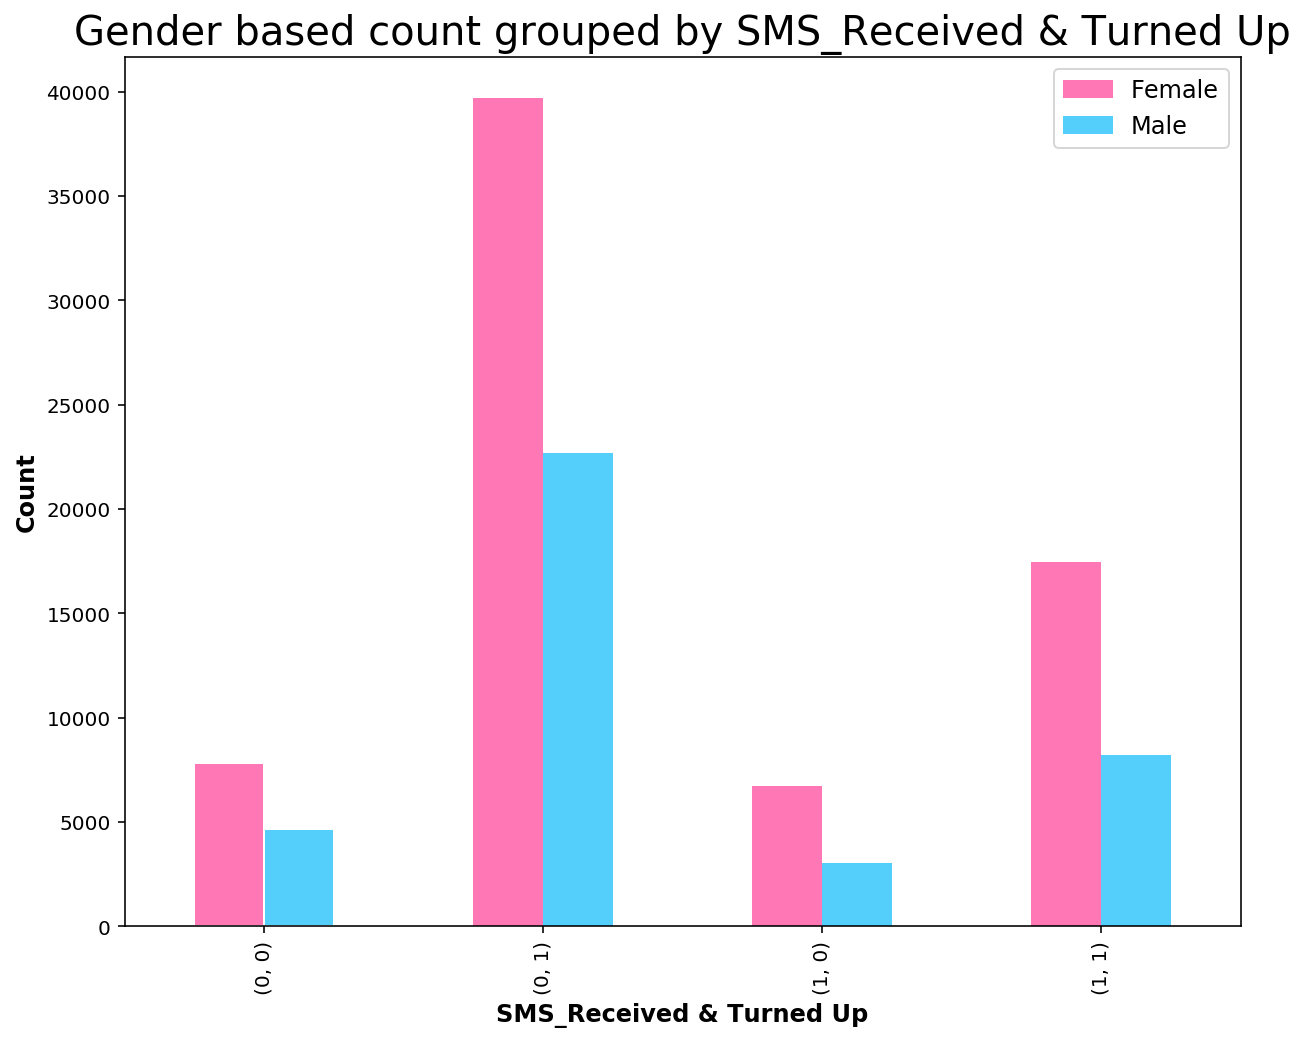

In [73]:
import matplotlib.patches as mpatches
col=['#ff77b4','#54CFFB']
data.groupby(['gender','sms_received'])['turned_up'].value_counts().unstack(0).plot.bar(figsize=(10,8),color=col,edgecolor="white");
plt.title('Gender based count grouped by SMS_Received & Turned Up',fontsize=20);
plt.xlabel('SMS_Received & Turned Up',fontsize = 12,fontweight="bold");
plt.ylabel('Count',fontsize = 12,fontweight="bold");
pink_patch = mpatches.Patch(color='#ff77b4', label='Female');
blue_patch = mpatches.Patch(color='#54CFFB', label='Male');
plt.legend(handles=[pink_patch,blue_patch],fontsize=12);

**SMS_receiving** doesn't have any impact on patient turned up for the appointments.Patients doesnt expect any notifications or confirmation messages from the hospital to turn up for their appointments.It is evident from the above graph that the **patient who doesnt receive any SMS turned up to the appointments are more in number than the patient's who receive the SMS**.

### 7. Wheather Scholarship is highly associated with patients turned up for the appointments?

In [74]:
#Creating a dataframe with records grouped by gender and sms_received
data_tur_sch = data.groupby(['scholarship'])['turned_up'].value_counts()
data_tur_sch_df = data_tur_sch.to_frame()
data_tur_sch_df.rename(columns={'turned_up':'count'},inplace=True)
data_tur_sch_df

count
scholarship turned_up       
0           1          79783
            0          19701
1           1           8266
            0           2577

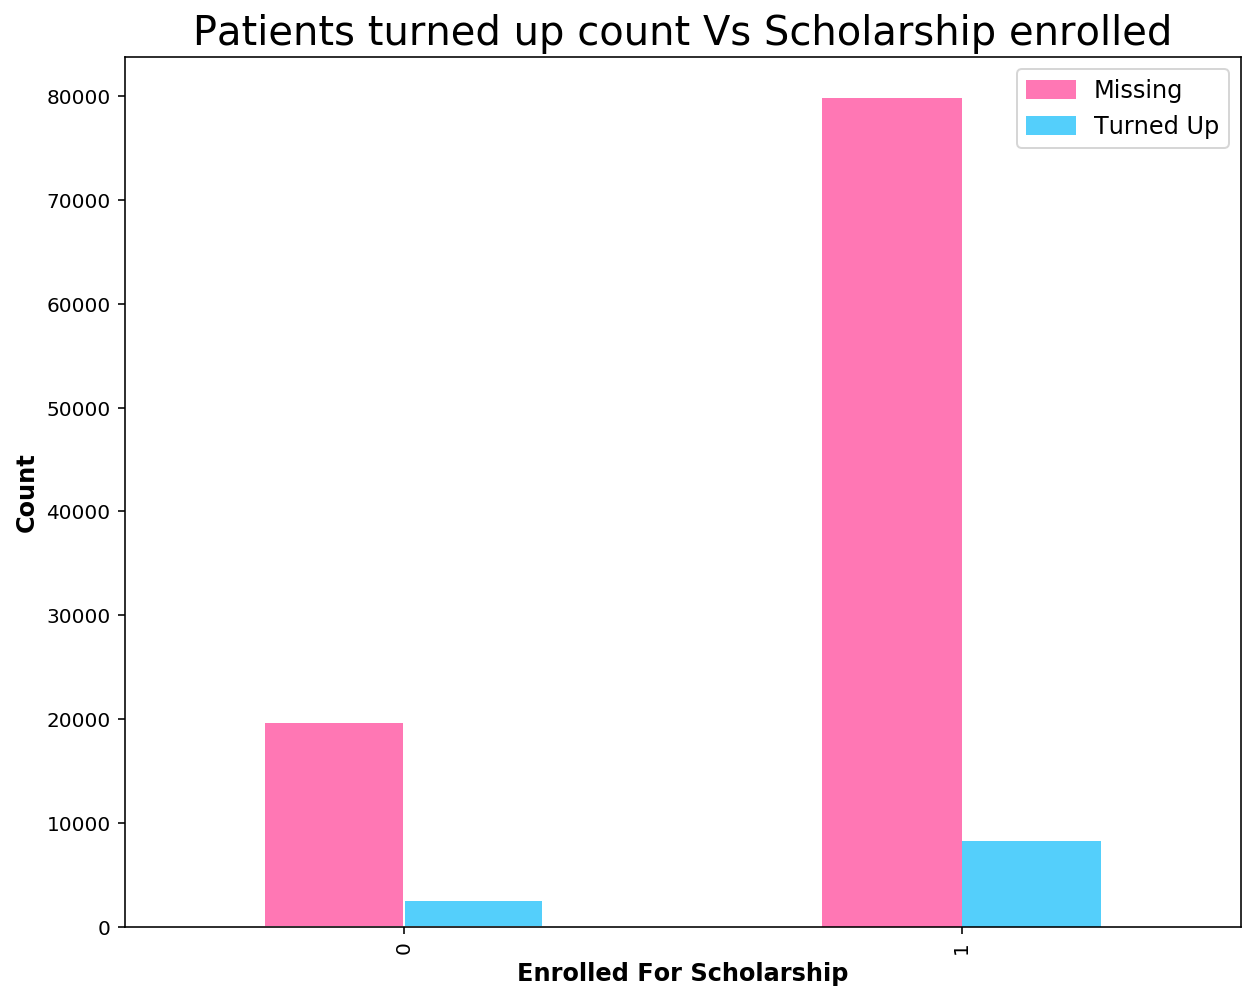

In [75]:
import matplotlib.patches as mpatches
data.groupby(['scholarship'])['turned_up'].value_counts().unstack(0).plot.bar(figsize=(10,8),color=col,edgecolor="white")
col=['#ff77b4','#54CFFB']                                                                                     
plt.title("Patients turned up count Vs Scholarship enrolled",fontsize=20);
plt.xlabel('Enrolled For Scholarship',fontsize = 12,fontweight="bold");
plt.ylabel('Count',fontsize = 12,fontweight="bold");
pink_patch = mpatches.Patch(color='#ff77b4', label='Missing');
blue_patch = mpatches.Patch(color='#54CFFB', label='Turned Up');
plt.legend(handles = [pink_patch,blue_patch],fontsize=12);

From the above visuals the people who have enrolled for the **scolarship turning up to the hospitals are less in numbers than the normal people turning up for the appointmnets without any welfare scolarship**.Around 10% of patients from the total patients without scolarship is turning up for their appointments.**So, the column scholarship has less correltion with patients turn up for the appointments**.

### 8. Which DayOfWeek is highly preferred by  patients  to turn up for their appointments?

In [88]:
day_app = data.groupby('turned_up')['weekday'].value_counts()
day_app_df = day_app.to_frame();
day_app_df.rename(columns={'weekday':'count'},inplace=True)
day_app_df

count
turned_up weekday         
0         Tuesday     5136
          Wednesday   5084
          Monday      4681
          Friday      4033
          Thrusday    3335
          Saturday       9
1         Wednesday  20740
          Tuesday    20448
          Monday     17997
          Friday     14952
          Thrusday   13882
          Saturday      30

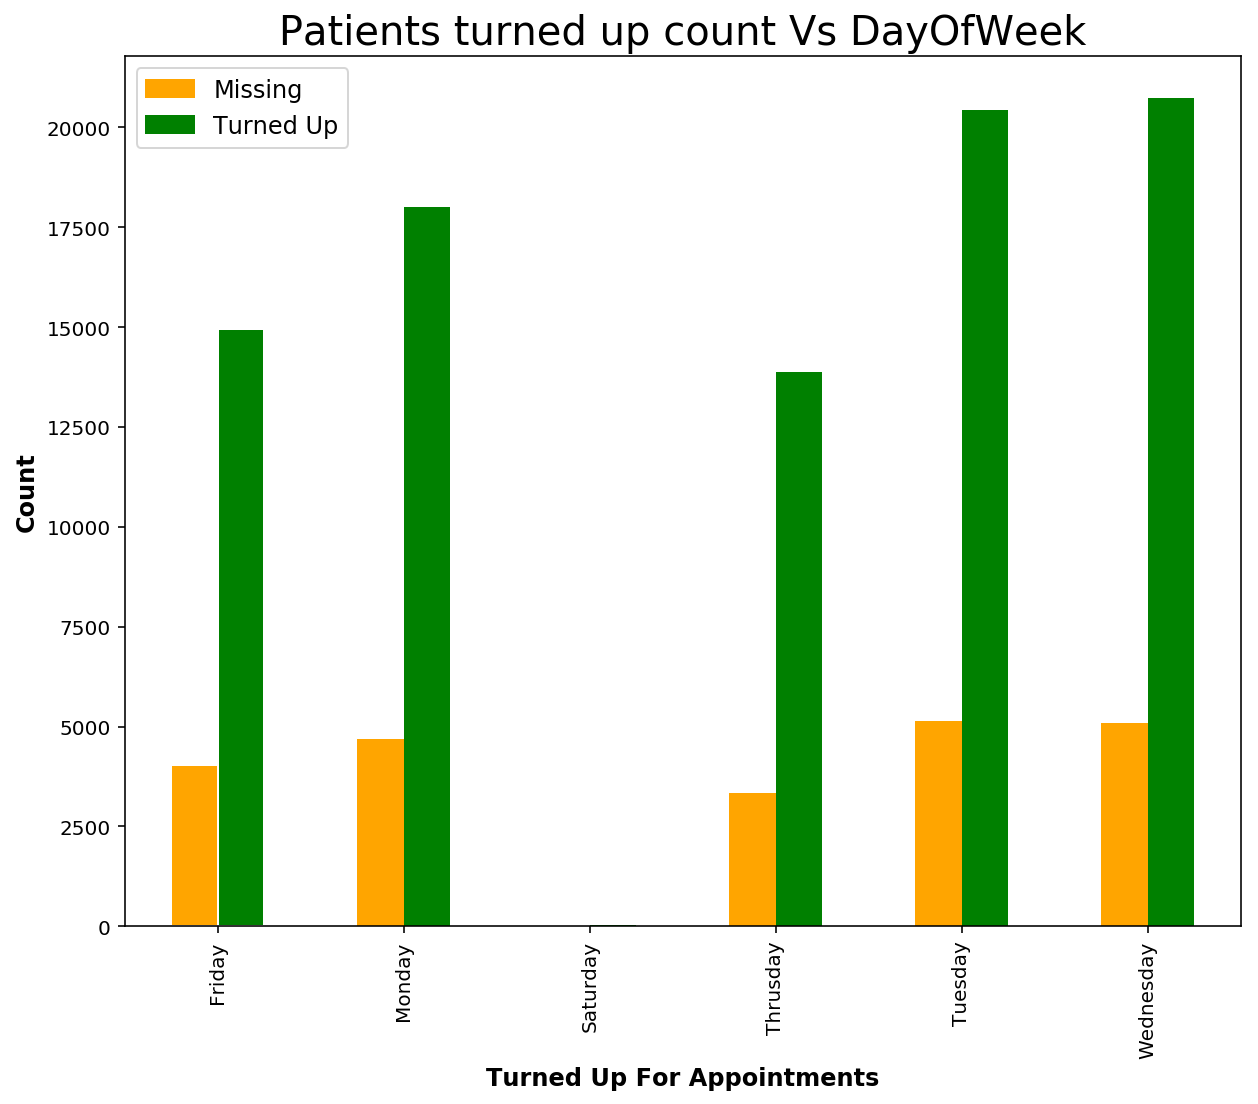

In [91]:
import matplotlib.patches as mpatches
col=['orange','green']
data.groupby('turned_up')['weekday'].value_counts().unstack(0).plot.bar(figsize=(10,8),color=col,edgecolor="white")
plt.title("Patients turned up count Vs DayOfWeek",fontsize=20);
plt.xlabel('Turned Up For Appointments',fontsize = 12,fontweight="bold");
plt.ylabel('Count',fontsize = 12,fontweight="bold");
org_patch = mpatches.Patch(color='orange', label='Missing');
grn_patch = mpatches.Patch(color='green', label='Turned Up');
plt.legend(handles = [org_patch,grn_patch],fontsize=12);                                                                                




It is clear from the graph that most of the people booked their appointments on weekday.**Wednesday** is the day which hold hign number of appoinments.There is no records on sunday which means  hopitals been closed on weekends sunday.On,Saturday very few patients booked their appoinments it might be because the brazil hospitals prefer half working day on saturdays.

###  Wheather diaseases like hipertension, diabetes, and alcoholism is highly associated with Pateint shown up?

In [93]:
# Filtering the patients records who is having the above three disease.

data_hyper = data[data['hipertension']==1]

data_hyper.shape


(21716, 19)

**21716 patients has the disease named hipertension**.Now we are going to check wheather hipertension in associated with patient shown up.

In [ ]:
data_hyper.head()

In [97]:
data_diab = data[data['diabetes']==1] 
data_diab.shape

(7900, 19)

**7900 patients has the disease named diabetes**.Now we are going to check wheather diabetes in associated with patient shown up.

In [ ]:
data_diab.head()

In [98]:
data_alco = data[data['alcoholism']==1]
data_alco.shape

(3352, 19)

**3352 patients has the disease named alcoholism**.Now we are going to check wheather alcoholism in associated with patient shown up.

In [ ]:
data_alco.head()

In [99]:
data_hyper.groupby(['gender','turned_up'])['turned_up'].count()

gender  turned_up
F       0             2640
        1            12650
M       0             1108
        1             5318
Name: turned_up, dtype: int64

In [100]:
data_diab.groupby(['gender','turned_up'])['turned_up'].count()

gender  turned_up
F       0            1011
        1            4569
M       0             411
        1            1909
Name: turned_up, dtype: int64

In [101]:
data_alco.groupby(['gender','turned_up'])['turned_up'].count()

gender  turned_up
F       0             308
        1             915
M       0             367
        1            1762
Name: turned_up, dtype: int64

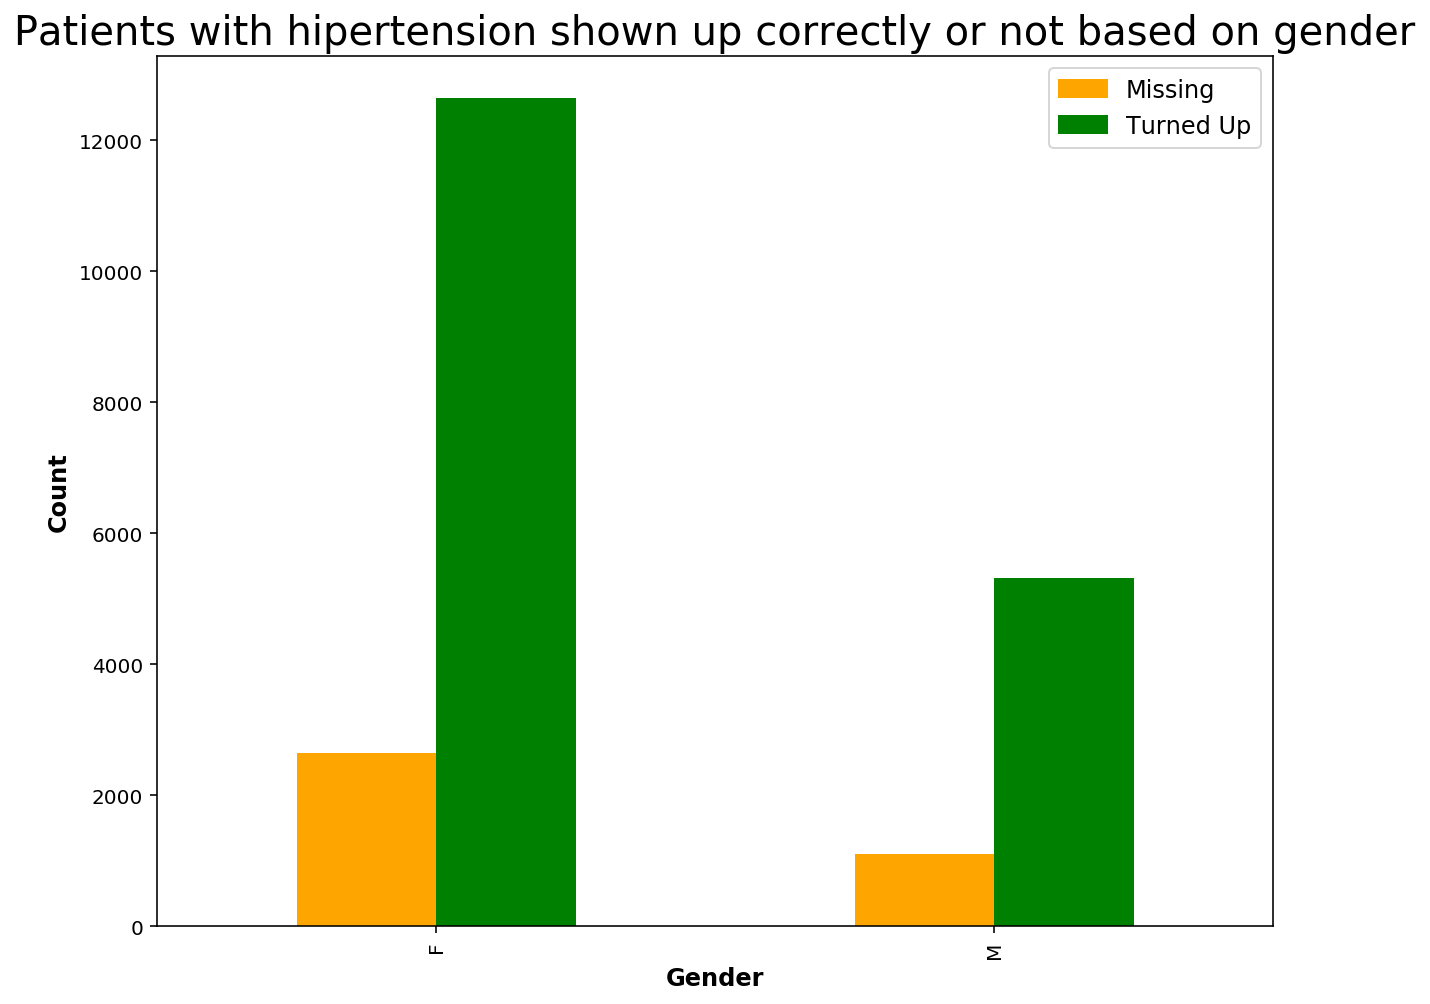

In [105]:
import matplotlib.patches as mpatches
col=['orange','green']
data_hyper.groupby('turned_up')['gender'].value_counts().unstack(0).plot.bar(figsize=(10,8),color=col);
plt.title("Patients with hipertension shown up correctly or not based on gender",fontsize=20);
plt.xlabel('Gender',fontsize = 12,fontweight="bold");
plt.ylabel('Count',fontsize = 12,fontweight="bold");
org_patch = mpatches.Patch(color='orange', label='Missing');
grn_patch = mpatches.Patch(color='green', label='Turned Up');
plt.legend(handles = [org_patch,grn_patch],fontsize=12);  

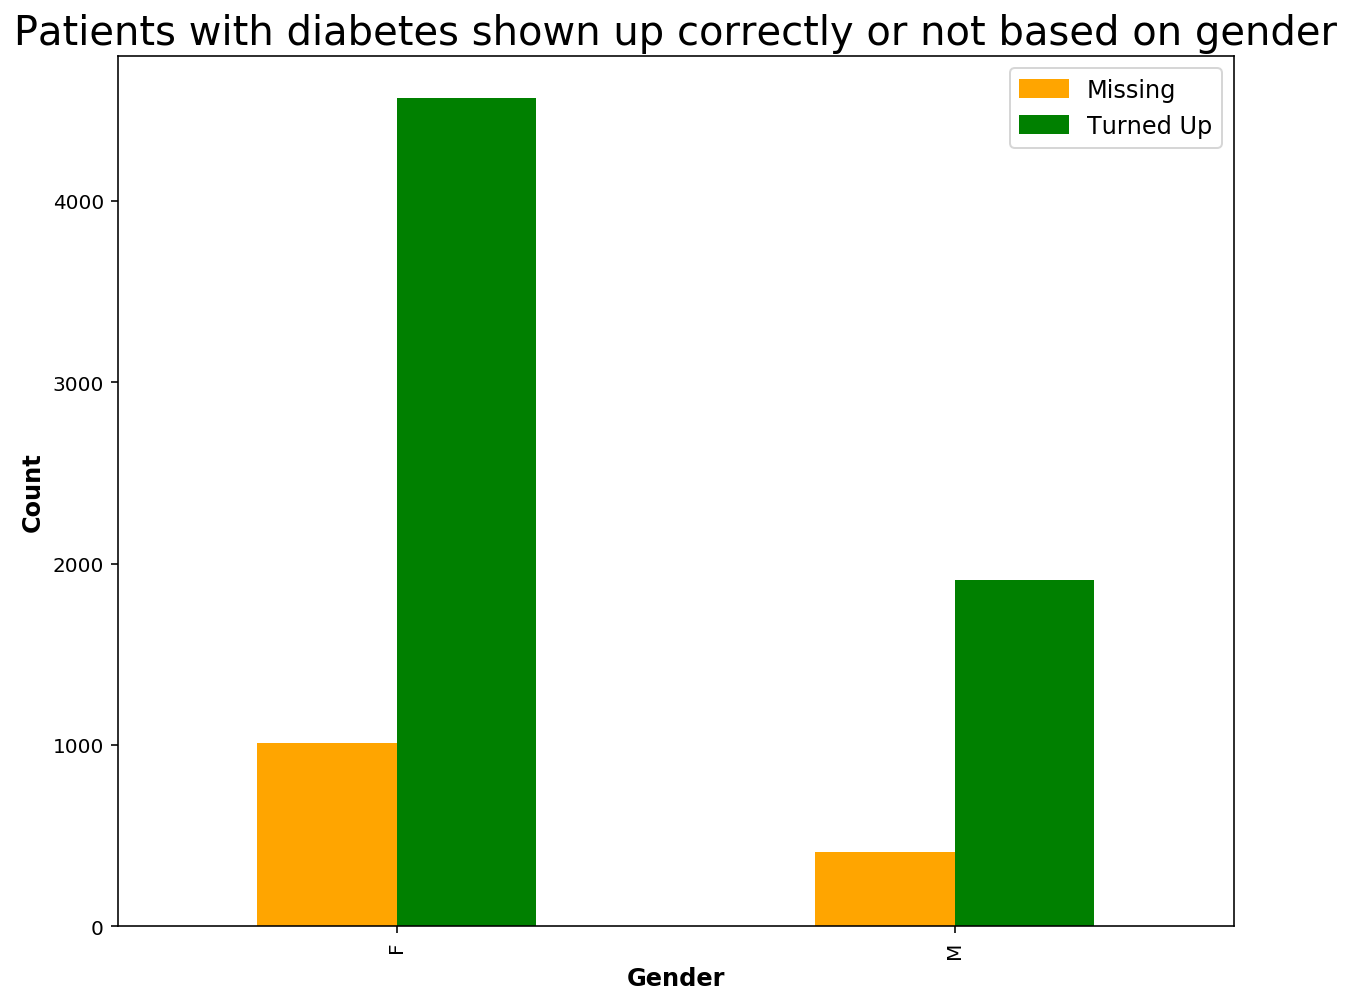

In [107]:
import matplotlib.patches as mpatches
col=['orange','green'];
data_diab.groupby('turned_up')['gender'].value_counts().unstack(0).plot.bar(figsize=(10,8),color=col);
plt.title("Patients with diabetes shown up correctly or not based on gender",fontsize=20);
plt.xlabel('Gender',fontsize = 12,fontweight="bold");
plt.ylabel('Count',fontsize = 12,fontweight="bold");
org_patch = mpatches.Patch(color='orange', label='Missing');
grn_patch = mpatches.Patch(color='green', label='Turned Up');
plt.legend(handles = [org_patch,grn_patch],fontsize=12); 

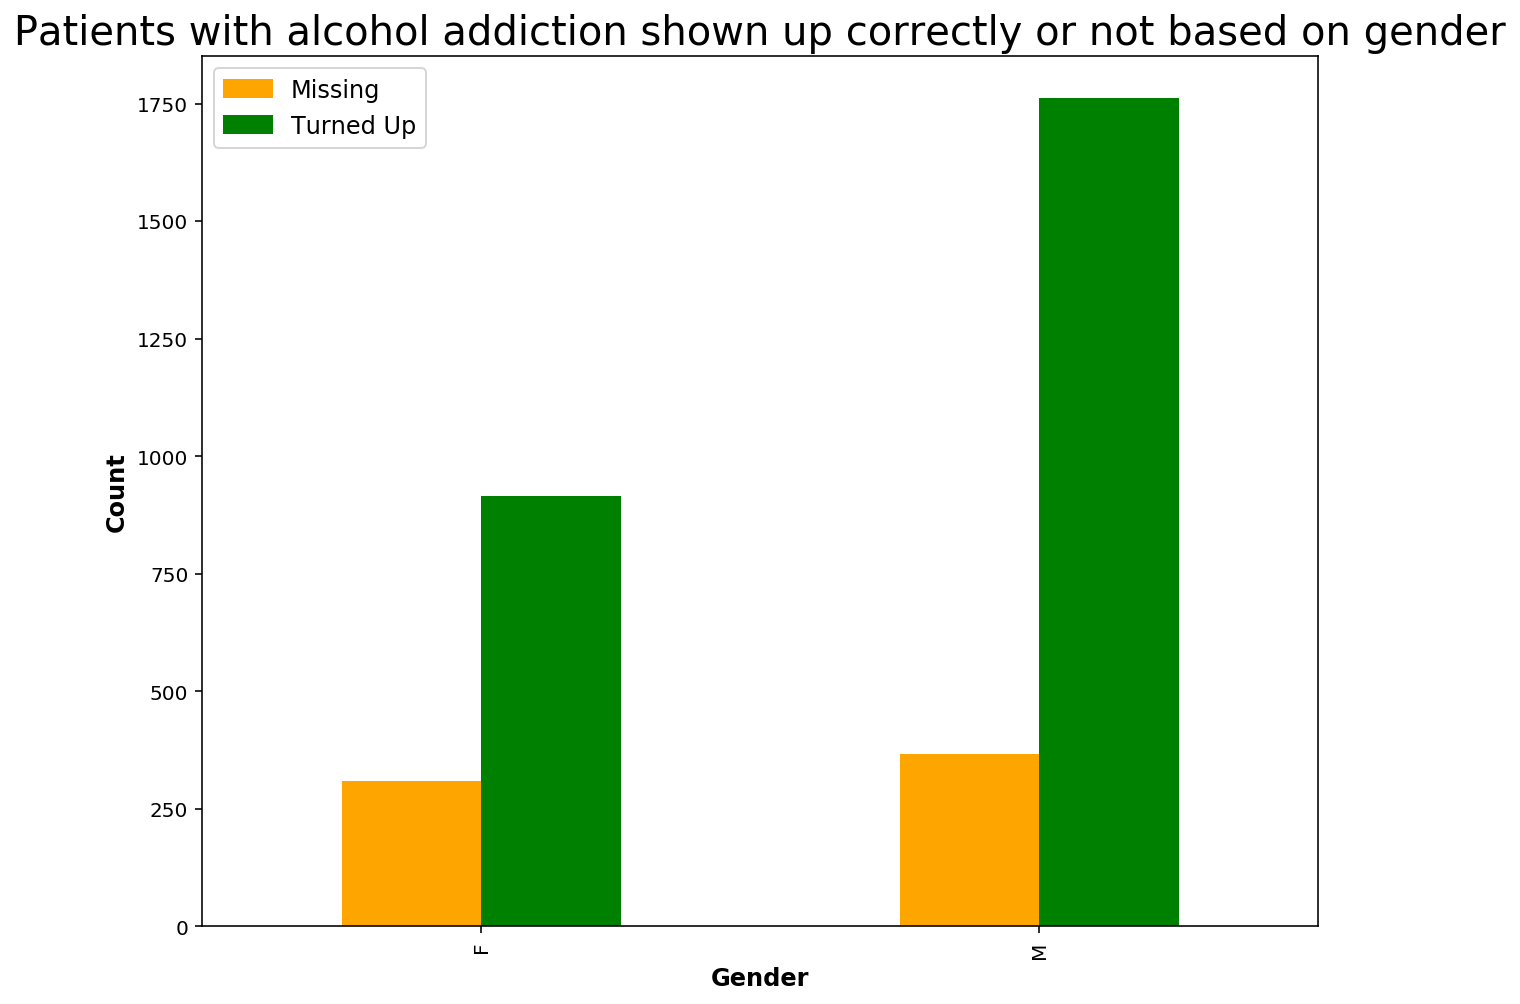

In [108]:
import matplotlib.patches as mpatches
col=['orange','green'];
data_alco.groupby('turned_up')['gender'].value_counts().unstack(0).plot.bar(figsize=(10,8),color=col);
plt.title("Patients with alcohol addiction shown up correctly or not based on gender",fontsize=20);
plt.xlabel('Gender',fontsize = 12,fontweight="bold");
plt.ylabel('Count',fontsize = 12,fontweight="bold");
org_patch = mpatches.Patch(color='orange', label='Missing');
grn_patch = mpatches.Patch(color='green', label='Turned Up');
plt.legend(handles = [org_patch,grn_patch],fontsize=12); 

**Patients with the above three diseases turned up for their appoinments mostly**.From the graph it is evident that Hipertension and diabetes are more common among Female patients than Male.On the otherhand alcoholism is found more common problem among mens then womens.**So, we can conclude that diabetes, hipertension and alcoholism has some strong relationship with the patients turned up for their appointments.**

<a id='conclusions'></a>
## Conclusions

After analysing the **Brazil Hospital Appointments Dataset**,we can conclusively states that:

<ol>
     <li>Male Patients booked appointmnets less in number when compared to Female patients i,e)Female patients are almost double in number when compared to male</li>
     <li>Columns like Scholorship,SMS_receving doesnt have any impact on patient turn up for their appointments</li>
     <li>Most of the appointments are booked on Wednesday.Approximately 90% of the appointmnets are booked on Weekdays.</li>
     <li>Alcoholism is the most common diesease found among mens compared to female patients</li>
     <li>Females are highly  affected with diseases like Diabetes and Hipertension when compared to Male. </li>
</ol>

## Limitations

There are some drawbacks in the **Brazil Hospital Appointments Dataset** which limits the analysis in depth.It includes:
<ol>
    <li>The dataset hold unbalanced records in terms of Gender i,e) Female records are more in number compared to Males.Female has almost 45% more records than Male patients records</li>
    <li>This dataset holds the records for the year 2016 only.It limits the analysis based on previous years.</li>
    <li>Its doesn't holds the information about the eligibility for Brazil Welfare Program i,e) for scholarship since most of the patients are not enrolled for this scholorship.We have not able to analyse the reason behind this without further information about the program.</li>

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])